<a href="https://colab.research.google.com/github/willisg25/Stat24/blob/main/Willis_Lab_9_Load_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets, transforms
import numpy as np
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the MNIST training data
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Extracting the data and targets as tensors
train_images = train_data.data
train_labels = train_data.targets

train_images.shape, train_labels.shape

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:01<00:00, 5550158.66it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 28881/28881 [00:00<00:00, 160975.53it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 1648877/1648877 [00:01<00:00, 1514387.87it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 4542/4542 [00:00<00:00, 3395816.18it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [2]:
import matplotlib.pyplot as plt

In [3]:
28*28 #number of pixels as indicated byy the torch size

784

In [4]:
train_images[0,:,:] #pull first image from train images batch

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [5]:
x = train_images[0,:,:]

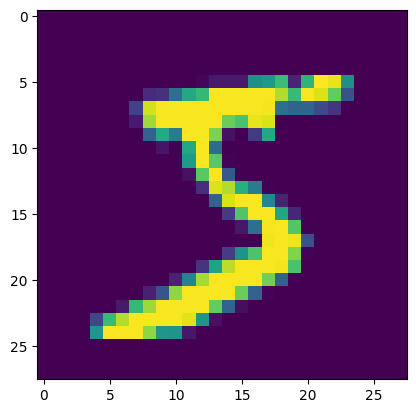

In [6]:
plt.imshow(x)

In [7]:
train_labels[0] #retrieves label attatched to forst image

tensor(5)

In [8]:
x.shape

torch.Size([28, 28])

In [9]:
x.flatten() #converts multi-dimension array into single dimension

tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
         18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 1

In [10]:
x = x.flatten()

In [11]:
x.shape

torch.Size([784])

In [12]:
x = x.reshape(28,28) #reshape to 28x28

In [13]:
x.shape

torch.Size([28, 28])

In [14]:
m = torch.rand(10,784) #new tensor with 10 rows and 784 columns

In [15]:
m

tensor([[0.7751, 0.6040, 0.1647,  ..., 0.6164, 0.2494, 0.6339],
        [0.0041, 0.6229, 0.1649,  ..., 0.0907, 0.0637, 0.1263],
        [0.0518, 0.3069, 0.9361,  ..., 0.3549, 0.2572, 0.5989],
        ...,
        [0.9391, 0.3086, 0.2160,  ..., 0.0150, 0.2426, 0.2710],
        [0.7359, 0.4232, 0.1136,  ..., 0.5718, 0.9333, 0.4238],
        [0.1076, 0.6560, 0.9894,  ..., 0.3509, 0.6002, 0.6959]])

In [16]:
m.shape

torch.Size([10, 784])

In [17]:
x = x.flatten()

In [18]:
x = x/255.0

In [19]:
x

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [20]:
m.shape,x.shape

(torch.Size([10, 784]), torch.Size([784]))

In [21]:
m@x #matrix multiplication of m and x

tensor([51.7176, 58.3113, 52.0613, 58.5184, 56.8809, 56.0143, 54.7020, 55.0675,
        56.5830, 53.7522])

In [22]:
y = torch.matmul(m,x) #matrix multiplication of m and x

In [23]:
y

tensor([51.7176, 58.3113, 52.0613, 58.5184, 56.8809, 56.0143, 54.7020, 55.0675,
        56.5830, 53.7522])

In [24]:
torch.max(y) #finds max

tensor(58.5184)

In [25]:
torch.argmax(y) #max tensor value of y

tensor(3)

In [26]:
x = train_images[0:25,:,:]/255.0 #normalizes the forst 25 images of the train images batch

In [27]:
x.shape

torch.Size([25, 28, 28])

In [28]:
x = x.reshape(25,784)

In [29]:
x.shape

torch.Size([25, 784])

In [30]:
x  = x.T #transposes x

In [31]:
x.shape

torch.Size([784, 25])

In [32]:
y = m@x #matrix multiplication of m and x

In [33]:
y.shape

torch.Size([10, 25])

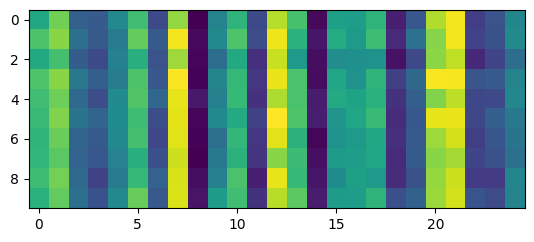

In [34]:
plt.imshow(y)